# Import Library

In [ ]:
!pip install Sastrawi ##Used for stemming for indonesian language

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


Menginstall library sastrawi yang akan digunakan untuk proses stemming

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics.pairwise import cosine_similarity

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

stem = StemmerFactory().create_stemmer()
stopword = StopWordRemoverFactory().create_stop_word_remover()

Menginstall library yang umum digunakan dan inisialisasi stemmer dan stopword removal

In [ ]:
import os, shutil

# Load Data

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bustanulkhair","key":"59214902db599e3f755fb1e9cf36c965"}'}

In [ ]:
# Buat direktori jika belum ada

os.makedirs("/root/.kaggle", exist_ok=True)

# Pindahkan file ke direktori .kaggle

shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Atur permission agar tidak terlalu terbuka

os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets download aprabowo/indonesia-tourism-destination

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 492MB/s]


Mendownload dataset dari kaggle dengan perintah diatas

In [ ]:
!unzip indonesia-tourism-destination.zip

Archive:  indonesia-tourism-destination.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


unzip folder untuk mengekstrak file di dalamnya

In [ ]:
tourism_rating = pd.read_csv("tourism_rating.csv")
tourism_with_id = pd.read_csv("tourism_with_id.csv")
user = pd.read_csv("user.csv")

dflist = [tourism_rating, tourism_with_id, user]
for i in dflist:
  display(i)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


load data yang telah di download dan di ekstrak

# Data Preprocessing

In [ ]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
tourism_with_id = tourism_with_id.drop(columns=['Time_Minutes', 'Unnamed: 11', 'Unnamed: 12'])
tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Coordinate   437 non-null    object 
 8   Lat          437 non-null    float64
 9   Long         437 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 34.3+ KB


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


tiga cell diatas untuk melihat info dari data yang digunakan seperti data type, jumlah entri, dll

## Merge Data Rating dan Tourism with ID

In [ ]:
data_recommendation = pd.merge(tourism_rating.groupby('Place_Id')['Place_Ratings'].mean(), tourism_with_id, on='Place_Id')
data_recommendation

,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,3.722222,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,2.840000,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,2.526316,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,2.857143,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,3.520000,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...,...
432,433,3.304348,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906
433,434,2.400000,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822
434,435,3.000000,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
435,436,3.090909,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753


Melakukan merge data rating dan tourism with id untuk melihat keterkaitan antar variabel nantinya. data ini juga sangat memungkinkan digunakan unutk content based filtering nantinya

In [ ]:
data_recommendation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Place_Id       437 non-null    int64  
 1   Place_Ratings  437 non-null    float64
 2   Place_Name     437 non-null    object 
 3   Description    437 non-null    object 
 4   Category       437 non-null    object 
 5   City           437 non-null    object 
 6   Price          437 non-null    int64  
 7   Rating         437 non-null    float64
 8   Coordinate     437 non-null    object 
 9   Lat            437 non-null    float64
 10  Long           437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


melihat info data setelah melakukan merge data

# Exploratory Data Analysis

## Melihat Count Traveler berdasarkan Usia

<ipython-input-15-1827c3b674a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age", data=user, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

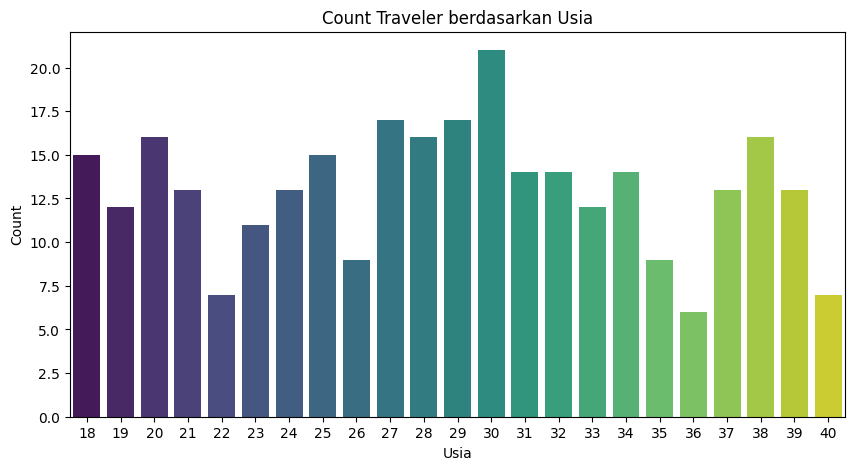

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Age", data=user, palette='viridis')
plt.title("Count Traveler berdasarkan Usia")
plt.xlabel("Usia")
plt.ylabel("Count")
plt.show

dapat dilihat distribusi data berdasarkan jumlah traveler dari usianya. dapat dilihat traveler terbanyak adalah usia 30 tahun

## Melihat Distribusi Lokasi User

<ipython-input-16-287646e3b261>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Location", data=user, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

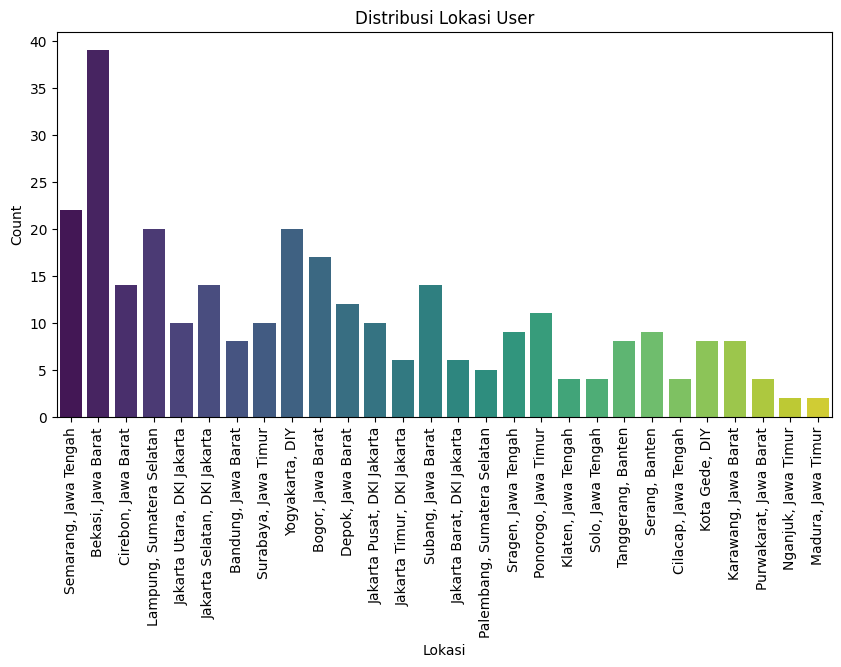

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Location", data=user, palette='viridis')
plt.title("Distribusi Lokasi User")
plt.xlabel("Lokasi")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show

cell ini unutk melihat penyebaran data lokasi user. sebagian besat user berlokasi di bekasi, semarang, cirebon dan yogyakarta

## Correlation Matrix data_recommendation

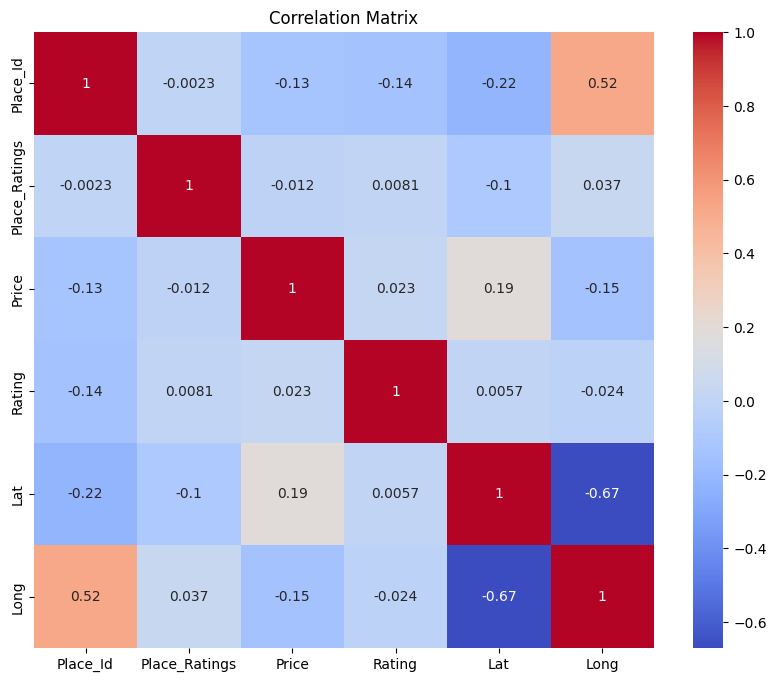

In [ ]:
# Inisilisasi corr matrix
correlation_matrix = data_recommendation.select_dtypes(include=['float64', 'int64']).corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

terlihat beberapa variabel yang memiliki positve correlations dan negative correlations yang cukup kuat

In [ ]:
# Find the strongest positive and negative correlations
strongest_positive_corr = correlation_matrix.unstack().sort_values().drop_duplicates().tail(5)
strongest_negative_corr = correlation_matrix.unstack().sort_values().drop_duplicates().head(5)

print("Strongest Positive Correlations:")
print(strongest_positive_corr)

print("\nStrongest Negative Correlations:")
print(strongest_negative_corr)

Strongest Positive Correlations:
Price     Rating           0.023243
Long      Place_Ratings    0.036522
Lat       Price            0.185358
Place_Id  Long             0.519688
Price     Price            1.000000
dtype: float64

Strongest Negative Correlations:
Lat       Long       -0.670239
          Place_Id   -0.222532
Long      Price      -0.147554
Rating    Place_Id   -0.142794
Place_Id  Price      -0.133997
dtype: float64


berikut adalah uraian correlations terkuat baik itu positive dan negative correlations.

# Data Preparation

## Stemming kalimat, Filter Stopwords & Membuat Variabel 'Tags'

In [ ]:
# fungsi untuk preprocessing data
def preprocessing(data):
  data = data.lower()
  data = stem.stem(data)
  data = stopword.remove(data)
  return data

fungsi untuk melakukan preprocessing kalimat

In [ ]:
data_cbf = data_recommendation.copy()
data_cbf['Tags'] = data_cbf['Description'] + ' ' + data_cbf['Category']
data_cbf = data_cbf.drop(columns=['Description', 'Category', 'Price', 'Place_Ratings', 'City'])
data_cbf['Tags'] = data_cbf['Tags'].apply(preprocessing)
data_cbf

,Place_Id,Place_Name,Rating,Coordinate,Lat,Long,Tags
0,1,Monumen Nasional,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,monumen nasional populer singkat monas tugu mo...
1,2,Kota Tua,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,kota tua jakarta juga nama kota tua pusat alun...
2,3,Dunia Fantasi,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,dunia fantasi sebut dufan tempat hibur letak k...
3,4,Taman Mini Indonesia Indah (TMII),4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,taman mini indonesia indah rupa suatu kawasan ...
4,5,Atlantis Water Adventure,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,atlantis water adventure kenal atlantis ancol ...
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,4.4,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,museum negeri mpu tantular buah museum negeri ...
433,434,Taman Bungkul,4.6,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,taman bungkul taman wisata kota letak pusat ko...
434,435,Taman Air Mancur Menari Kenjeran,4.4,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,air mancur tari dancing fountain ada kawasan j...
435,436,Taman Flora Bratang Surabaya,4.6,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,taman flora salah satu taman kota surabaya rup...


membuat kolom bari bernama 'Tags' sebagai overview destinasi wisata. variabel ini berisikian value kolom 'Description' dan 'Category'. kemudian menampung data baru di variabel data_cbf yang telah melewati proses drop variabel yang saya anggap perlu untuk di drop karena sudah tidak dibutuhkan.

## TF-IDF Vectorizer

In [ ]:
# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Mealkukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = vectorizer.fit_transform(data_cbf['Tags']).toarray()

# Menampilkan hasil
print(tfidf_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(437, 4962)

dua cell diatas digunakan untuk melakukan vectorizer yang sangat berguna karena data kita menggunakan data teks dan kita akan mencari similarity untuk pendekatan content-based filtering

# Modeling Pendekatan Content-Based Filtering

## Cosine Similarity

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.04510993, 0.07188361, ..., 0.02304813, 0.01459437,
        0.00994663],
       [0.04510993, 1.        , 0.01922348, ..., 0.02402561, 0.01486861,
        0.0579609 ],
       [0.07188361, 0.01922348, 1.        , ..., 0.04484191, 0.08022609,
        0.0144817 ],
       ...,
       [0.02304813, 0.02402561, 0.04484191, ..., 1.        , 0.05645506,
        0.04562539],
       [0.01459437, 0.01486861, 0.08022609, ..., 0.05645506, 1.        ,
        0.11897411],
       [0.00994663, 0.0579609 , 0.0144817 , ..., 0.04562539, 0.11897411,
        1.        ]])

menghitung cosine similarity dari data untuk mendapatkan kesamaan antara data yang nantinya digunakan untuk mendapatkan rekomendasi

In [ ]:
# membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama tempat wisata
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_cbf['Place_Name'], columns=data_cbf['Place_Name'])
print('Shape:', cosine_sim_df.shape)

# menampilkan cosine_sim_df pada setiap place name
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


Place_Name,Taman Lapangan Banteng,Candi Borobudur,NuArt Sculpture Park,Water Park Bandung Indah,Taman Kasmaran
Place_Name,,,,,
Taman Bunga Cihideung,0.015253,0.043835,0.026990,0.036888,0.112823
Embung Tambakboyo,0.011622,0.025911,0.013086,0.033299,0.033787
Tafso Barn,0.026963,0.035214,0.055237,0.100827,0.047181
Curug Cipanas,0.011883,0.029160,0.009159,0.133807,0.020361
Air Terjun Sri Gethuk,0.016243,0.032774,0.026411,0.083923,0.014522
Patung Sura dan Buaya,0.052022,0.016657,0.071196,0.009491,0.016435
Hutan Kota Srengseng,0.059490,0.026424,0.035031,0.042436,0.078395
Bukit Jamur,0.014119,0.028751,0.023708,0.044239,0.027366
Farm House Susu Lembang,0.018053,0.041081,0.061460,0.044853,0.092757


membuat datafram dari variabel cosine_sim dengan baris dan kolom berupa tempat wisata. kemudian menampilkan sampel cosine_sim_df

In [ ]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=data_cbf[['Place_Name', 'Tags']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop place_name agar nama tempat yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(place_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

modeling fungsi untuk mendapatkan rekomendasi. dengan menggunakan argpartition, kita mengambil sejumlah nilai k tertinggi dari similarity data. kemudian kita mengambil data dari bobot tertinggi ke terendah. berikutnya kita perlu menghapus place_name yang dicarai agar tidak muncul dalam rekomendasi

## Mendapatkan Rekomendasi

In [ ]:
place_recommendations('Pantai Nglambor')

,Place_Name,Tags
0,Pantai Drini,pantai drini salah satu objek wisata letak des...
1,Pantai Kukup,pantai kukup salah satu pantai milik hampar pa...
2,Pantai Timang,pantai timang objek wisata upa pantai wilayah ...
3,Pantai Jogan,pantai jogan objek wisata pantai letak dusun d...
4,Pantai Sundak,pantai sundak rupa salah satu pantai indah ada...


terlihat beberapa destinasi wisata yang kita dapatkan sebagai rekomendasi berdasarkan tempat 'Pantai Nglambor'

# Modeling Collaborative Filtering

In [ ]:
df = tourism_rating.copy()
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


copy touris_rating dan dimasukkan ke variabel df agar data yang digunakan bisa di manipulasi lebih lanjut tanpa mengganggu data sebelumnya

## Data Preparation

### Encoding

In [ ]:
# Mengubah User_Id menjadi tanpa nilai yang sama
user_ids = df['User_Id'] .unique().tolist()
print('list User_Id: ', user_ids)

# Melakukan encoding User_Id
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user2user_encoded)

# Melakukan proses encoding angka ke User_Id
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
print('encoded angkak ke User_Id: ', user2user_encoded)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

kita melakuakn encoding pada kolom User_Id, untuk mengubah nilai user ID yang bersifat unik menjadi representasi numerik agar dapat digunakan dalam model machine learning

In [ ]:
# Mengubah Place_Id menjadi tanpa nilai yang sama
place_ids = df['Place_Id'] .unique().tolist()
print('list Place_Id: ', place_ids)

# Melakukan encoding Place_Id
place2place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded Place_Id : ', place2place_encoded)

# Melakukan proses encoding angka ke Place_Id
place_encoded2place = {i: x for i, x in enumerate(place_ids)}
print('encoded angkak ke Place_Id: ', place2place_encoded)

list Place_Id:  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 1

hal yang sama dilakukan pada kolom Place_Id untuk mengubah nilai place ID yang bersifat unik menjadi representasi numerik agar dapat digunakan dalam model machine learning

In [ ]:
# Mapping User_Id ke dataframe user
df['user'] = df['User_Id'].map(user2user_encoded)

# Mapping Place_Id ke dataframe tempat wisata
df['place'] = df['Place_Id'].map(place2place_encoded)
df

,User_Id,Place_Id,Place_Ratings,user,place
0,1,179,3,0,0
1,1,344,2,0,1
2,1,5,5,0,2
3,1,373,3,0,3
4,1,101,4,0,4
...,...,...,...,...,...
9995,300,425,2,299,324
9996,300,64,4,299,132
9997,300,311,3,299,348
9998,300,279,4,299,290


Kode tersebut digunakan untuk menambahkan kolom baru pada DataFrame df yang berisi hasil encoding dari User_Id dan Place_Id. Melalui map(), kolom User_Id diubah menjadi kolom user menggunakan dictionary user2user_encoded, sedangkan kolom Place_Id diubah menjadi kolom place menggunakan place2place_encoded. Ini penting agar model machine learning, terutama yang berbasis embedding seperti neural collaborative filtering, bisa bekerja dengan data numerik terstruktur alih-alih ID string yang tidak bisa langsung diproses oleh model

In [ ]:
# Mendapatkan jumlah user
num_users = len(user2user_encoded)
print(num_users)

# Mendapatkan jumlah place name
num_place = len(place2place_encoded)
print(num_place)

# Nilai minimum rating
min_rating = min(df['Place_Ratings'])

# Nilai maksmisal Place_Ratings
max_rating = max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

300
437
Number of User: 300, Number of Place: 437, Min Rating: 1, Max Rating: 5


disini kita mendapatkan informasi dasar mengenai data yang akan digunakan model. pertama num_users dan num_place menghitung jumlah unik pengguna dan tempat wisata berdsarkan hasil encoding sebelumnya. kemudian, min_rating, dan max_rating digunakan unutk mengetahui nilai rating yang diberikan pengguna terhadap tempat wisata. informasi ini penting dalam membangun dan menyesuaikan model, terutama untuk proses normalisasi rating atau sebagai referensi dalam evaluasi peforma model

### Spliting Data

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3,187,262
4684,142,268,2,141,83
1731,54,103,3,53,10
4742,144,119,3,143,141
4521,138,288,5,137,283
...,...,...,...,...,...
5734,173,402,5,172,175
5191,157,85,4,156,33
5390,163,18,3,162,52
860,28,416,4,27,187


sebelum splitting data kita melakukan pengacakan terlebih dahulu. menginsialisasi random_state agar mendapatkan data yang konsisten

In [ ]:
# Membuat variabel x untuk mencocokkaan data user dan place menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y unutk membuat rating
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80:20
train_indices = int(0.8 * df.shape[0])
X_train, X_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print(x, y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


kita membagi data train dan validation dalam ratio 80:20. yaitu 80 persen data training dan 20 persen data validation

## Training Model

In [ ]:
class RecommenderNet(tf.keras.Model):
  # Inisialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # Layer embedding user bias
    self.place_embedding = layers.Embedding( # layer embeddings place
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) # layer embedding place bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:,0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

Pada tahap ini, model menghitung skor kecocokan antara pengguna dan tourism place dengan teknik embedding. Pertama, kita melakukan proses embedding terhadap data user dan place. selanjutnya, lakukan operasi perkalian dot product antara embedding user dan place. selain itu, kita juga fapat menambahkan bias unutk setiap user dan place. skor kecocokan diterapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid

In [ ]:
# Inisialisasi Model
model = RecommenderNet(num_users, num_place, 50)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

model ini menggunakan Binary Crossentropy unutk menghitung loss function, Adam sebagai optimizer, dan RMSE sebagai metrics evaluation

In [ ]:
# Train model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (X_val, y_val)
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6943 - root_mean_squared_error: 0.3452 - val_loss: 0.6933 - val_root_mean_squared_error: 0.3451
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6876 - root_mean_squared_error: 0.3428 - val_loss: 0.6938 - val_root_mean_squared_error: 0.3454
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6794 - root_mean_squared_error: 0.3348 - val_loss: 0.6944 - val_root_mean_squared_error: 0.3458
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6774 - root_mean_squared_error: 0.3313 - val_loss: 0.6957 - val_root_mean_squared_error: 0.3467
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6681 - root_mean_squared_error: 0.3262 - val_loss: 0.6965 - val_root_mean_squared_error: 0.3472
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6673 - root_mean_squared_error: 0.3259 - val_loss: 0.6973 - val_root_mean_squared_error: 0.3478
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

dari hasil training kita dapat rmse yang cukup memuaskan yaitu di angka 0.36

## Evaluasi & Visualisasi

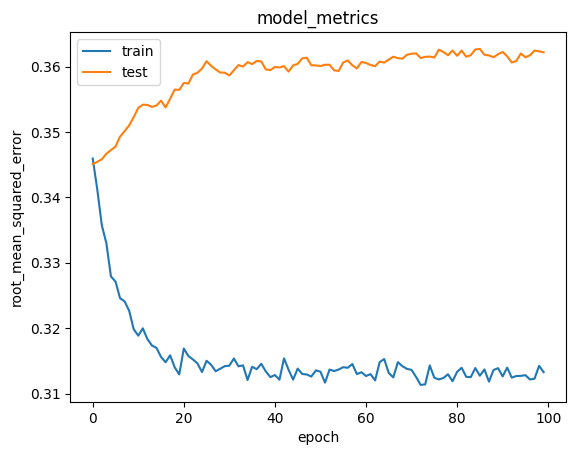

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dari hasil visualisasi, terdapat skor rmse yang berbeda antara tes dan train. loss sangat rendah pada train dan naik di saat data test. ada kemungkinan model overfitting namun saya rasa cukup memusakan akan hasil ini

In [ ]:
place_df = data_cbf

# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['Place_Id'].isin(place_visited_by_user.Place_Id.values)]['Place_Id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place2place_encoded.keys()))
)

place_not_visited = [[place2place_encoded.get(x)] for x in place_not_visited]
user_encoder = user2user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)



In [ ]:
place_df

,Place_Id,Place_Name,Rating,Coordinate,Lat,Long,Tags
0,1,Monumen Nasional,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,monumen nasional populer singkat monas tugu mo...
1,2,Kota Tua,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,kota tua jakarta juga nama kota tua pusat alun...
2,3,Dunia Fantasi,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,dunia fantasi sebut dufan tempat hibur letak k...
3,4,Taman Mini Indonesia Indah (TMII),4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,taman mini indonesia indah rupa suatu kawasan ...
4,5,Atlantis Water Adventure,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,atlantis water adventure kenal atlantis ancol ...
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,4.4,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,museum negeri mpu tantular buah museum negeri ...
433,434,Taman Bungkul,4.6,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,taman bungkul taman wisata kota letak pusat ko...
434,435,Taman Air Mancur Menari Kenjeran,4.4,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,air mancur tari dancing fountain ada kawasan j...
435,436,Taman Flora Bratang Surabaya,4.6,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,taman flora salah satu taman kota surabaya rup...


disini kita menyiapkan data input bagi model rekomendasi, dengan fokus pada destinasi wisata yang belum dikunjungi oleh seorang pengguna tertentu.

In [ ]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded2place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for users: {}".format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
  print(row.Place_Name, ':', row.Tags)

print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name, ':', row.Tags)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Showing recommendations for users: 61
Place with high ratings from user
--------------------------------
Ledok Sambi : desa wisata ledok sambi rupa desa punya nuansa alami asli jogja lokasi dekat gunung rapi ada jl kaliurang km 19 2 padukuhan sambi desa pakembinangun kec pakem kabupaten sleman daerah istimewa yogyakarta pandang alam indah beri sejuk segar ketentraman hati panjang mata pandang desa wisata anda suguh bentang luas sawah alami asri juga pohon hijau nan rindang jernih air milik wilayah desa wisata ledok sambi rumah tradisional khas jogja luas jadi bagai tempat main nikmat udara sejuk tenang hati jiwa pikir cagar alam
Museum Barli : museum barli buah museum letak kota bandung museum dedikasi kenang pamer hasil karya peluk barli sasmitawinata museum diri tahun 1990 resmi oktober 1992 soesilo soedarman menteri pariwisata pos telekomunikasi waktu awal museum tidak buka umum saat museum kunjung siapa museum juga jadi tempat bagai giat seni

dapat dilihat model dapat memberikan rekomendasi yang dipersonalisasi bagi pengguna berdasarkan tempat yang belum pernah di kunjungi